 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

# YOUR CODE HERE
whale_data = pd.read_csv(whale_returns_csv)
whale_data.set_index(pd.to_datetime(whale_data['Date'], infer_datetime_format=True), inplace=True)
whale_data = whale_data.drop(columns=["Date"])
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_data.dropna(inplace=True)
whale_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_data = pd.read_csv(algo_returns_csv)
algo_data.set_index(pd.to_datetime(algo_data['Date'], infer_datetime_format=True), inplace=True)
algo_data = algo_data.drop(columns=["Date"])
algo_data = algo_data.rename(columns={
    "Algo 1": "ALGORITHM 1",
    "Algo 2": "ALGORITHM 2"
})
algo_data.head(10)

,ALGORITHM 1,ALGORITHM 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [8]:
# Count nulls
algo_data.isnull().sum()

ALGORITHM 1    0
ALGORITHM 2    6
dtype: int64

In [9]:
# Drop nulls
algo_data.dropna(inplace=True)
algo_data

,ALGORITHM 1,ALGORITHM 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [10]:
# Count nulls
algo_data.isnull().sum()

ALGORITHM 1    0
ALGORITHM 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_data = pd.read_csv(sp500_history_csv)
sp500_data.set_index(pd.to_datetime(sp500_data['Date'], infer_datetime_format=True), inplace=True)
sp500_data = sp500_data.drop(columns=["Date"])
sp500_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [12]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_data['Close'] = sp500_data['Close'].str.replace('$', '')
sp500_data.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [14]:
sp500_data = sp500_data.astype(float).astype(int)
sp500_data = sp500_data.sort_values(by='Date', ascending=True)
sp500_data.head()

,Close
Date,
2012-10-01,1444
2012-10-02,1445
2012-10-03,1450
2012-10-04,1461
2012-10-05,1460


In [15]:
# Calculate Daily Returns
# daily_sp500_returns = (sp500_data - sp500_data.shift(1)) / sp500_data.shift(1)
daily_sp500_returns = sp500_data.pct_change()
daily_sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000693
2012-10-03,0.003460
2012-10-04,0.007586
2012-10-05,-0.000684


In [16]:
# Drop nulls
daily_sp500_returns.dropna(inplace=True)
daily_sp500_returns

,Close
Date,
2012-10-02,0.000693
2012-10-03,0.003460
2012-10-04,0.007586
2012-10-05,-0.000684
2012-10-08,-0.003425
...,...
2019-04-16,0.000688
2019-04-17,-0.002408
2019-04-18,0.001724


In [17]:
# Rename Column
# Rewrite the column names
columns = ["SP500"]
daily_sp500_returns.columns = columns
daily_sp500_returns.head()

,SP500
Date,
2012-10-02,0.000693
2012-10-03,0.003460
2012-10-04,0.007586
2012-10-05,-0.000684
2012-10-08,-0.003425


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Concatenate all DataFrames into a single DataFrame
joined_daily_returns = pd.concat([whale_data, algo_data, daily_sp500_returns], axis='columns', join='inner')
joined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGORITHM 1,ALGORITHM 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004724
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004271
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001430
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014279
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003863


In [19]:
joined_daily_returns.to_csv("Resources/combined.csv", index=True)

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

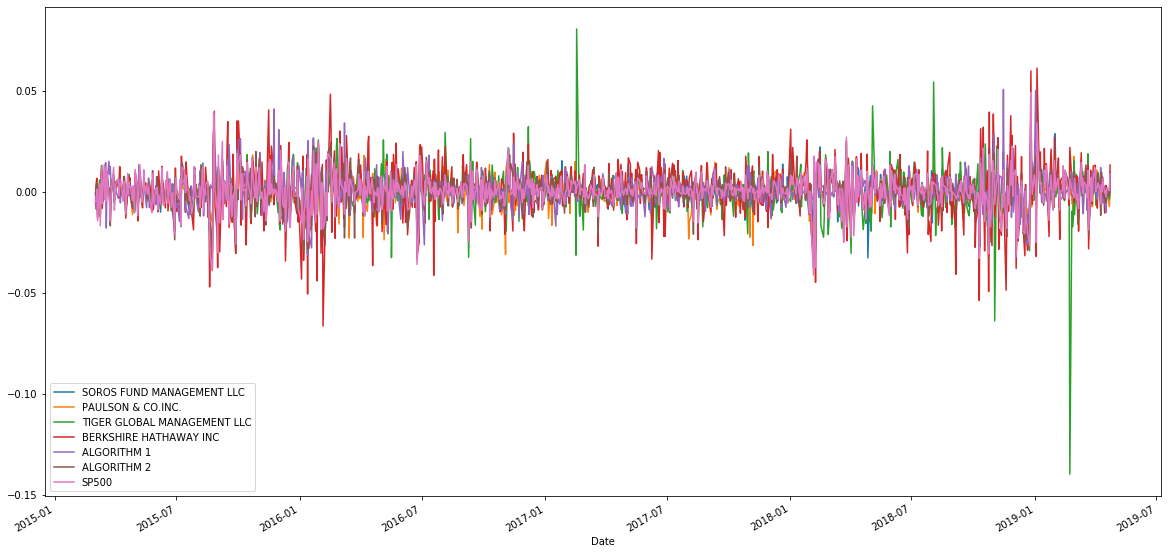

In [20]:
# Plot daily returns
joined_daily_returns.plot(figsize=(20,10))

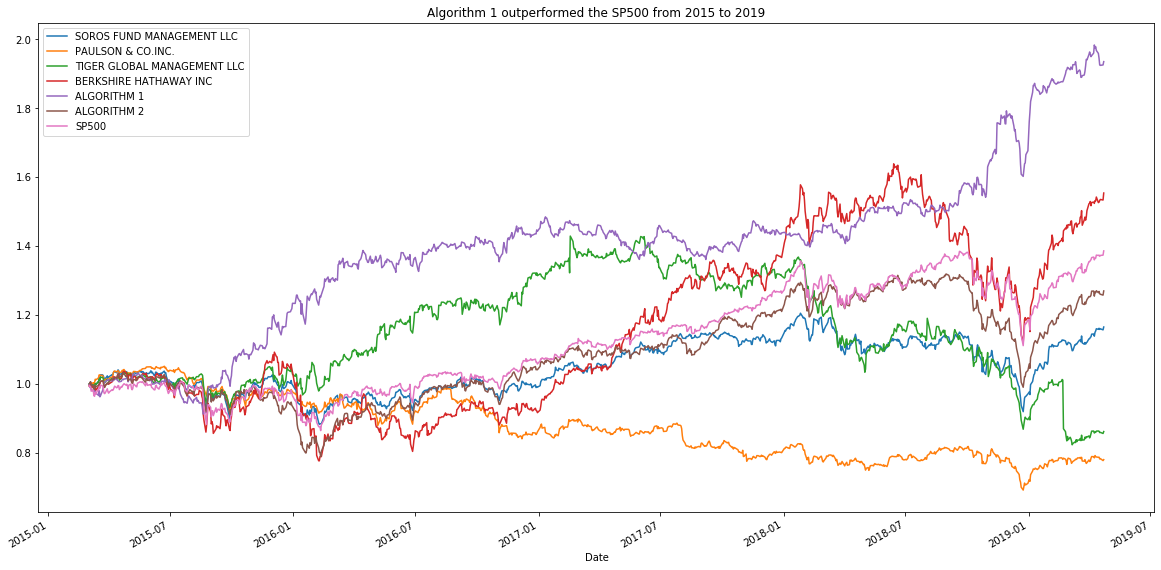

In [21]:
# Plot cumulative returns
joined_cumulative_returns = (1 + joined_daily_returns).cumprod()
joined_cumulative_returns.plot(figsize=(20,10), title='Algorithm 1 outperformed the SP500 from 2015 to 2019')

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

Berkshire Hathaway Inc shows the largest dispersion while Algorith 1 shows the smallest


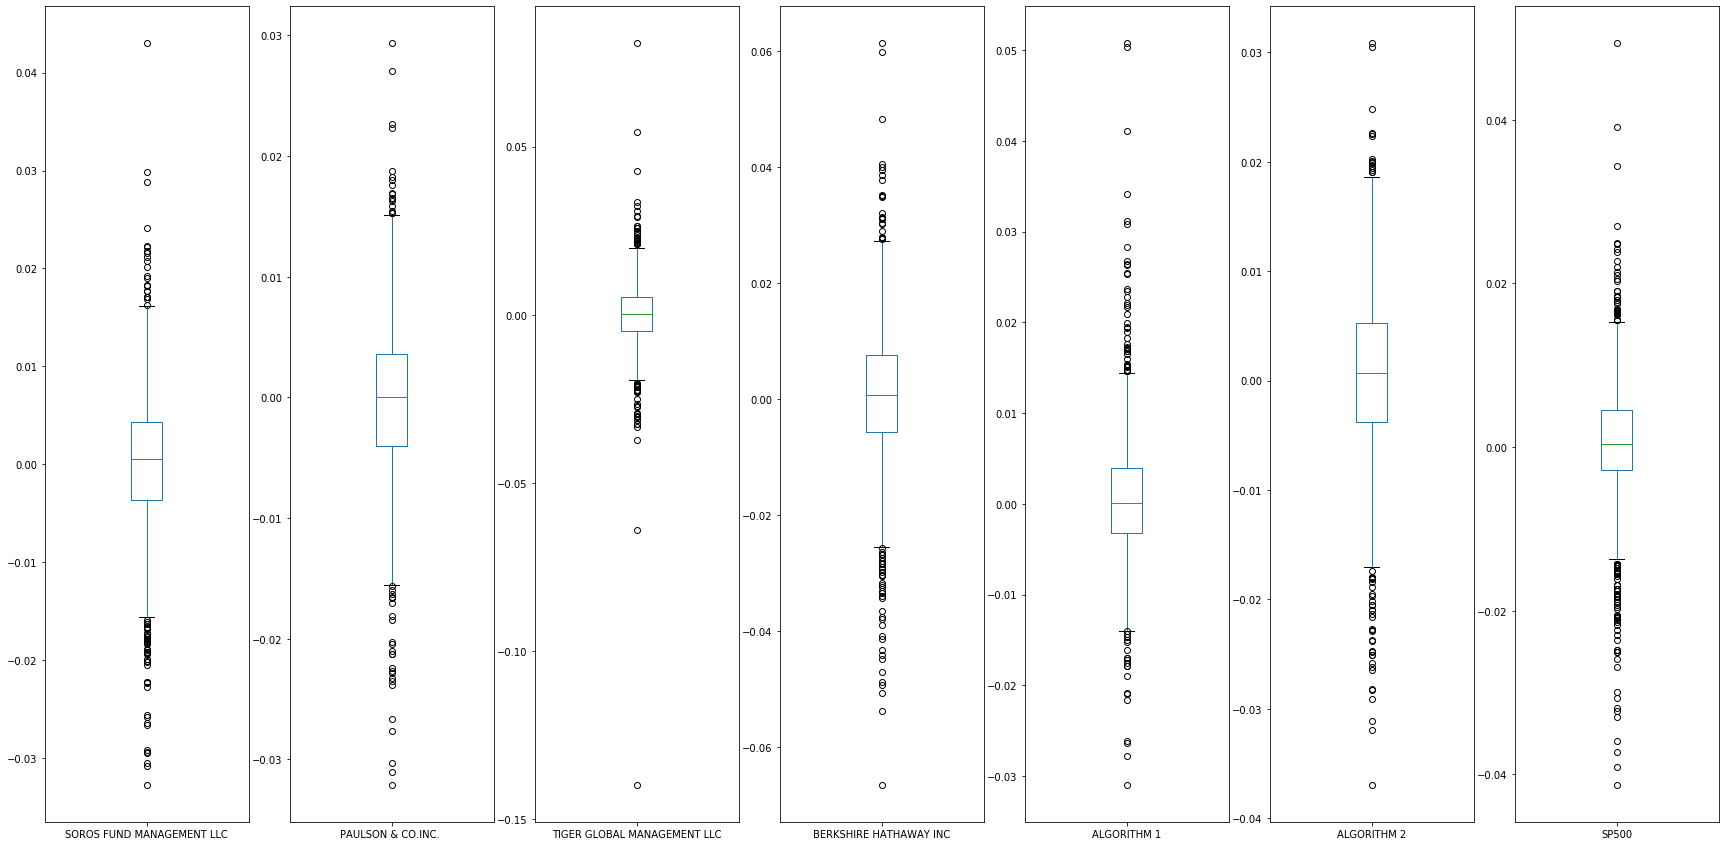

In [22]:
# Box plot to visually show risk

joined_daily_returns.plot.box(subplots=True, figsize=(30,15))
print('Berkshire Hathaway Inc shows the largest dispersion while Algorith 1 shows the smallest')

In [23]:
# Daily Standard Deviations
joined_daily_std = joined_daily_returns.std()
joined_daily_std = joined_daily_std.sort_values(ascending=False)
joined_daily_std.head(7)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008553
ALGORITHM 2                    0.008342
SOROS FUND MANAGEMENT LLC      0.007895
ALGORITHM 1                    0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [24]:
# Calculate the annualized standard deviation (252 trading days)
joined_annualized_std = joined_daily_std * np.sqrt(252)
joined_annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135771
ALGORITHM 2                    0.132430
SOROS FUND MANAGEMENT LLC      0.125335
dtype: float64

In [25]:
print('Berkshire Hathaway Inc and Tiger Global Management LLCs portfolios are riskier than the S&P500')

Berkshire Hathaway Inc and Tiger Global Management LLCs portfolios are riskier than the S&P500


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

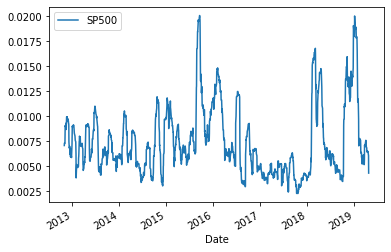

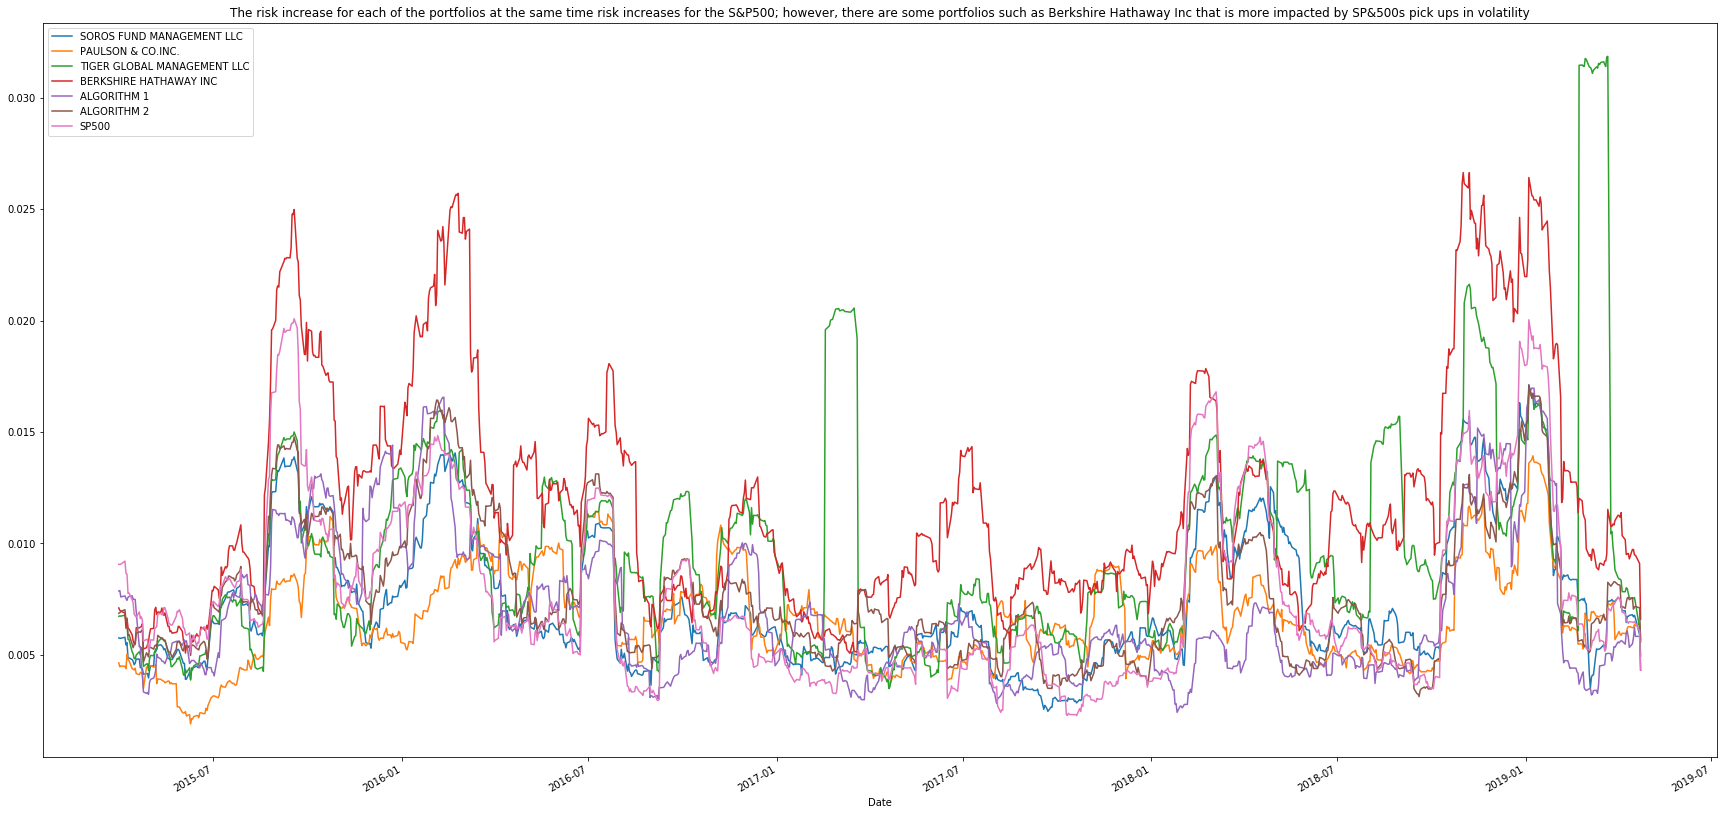

In [26]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
daily_sp500_returns.rolling(window=21).std().plot()
joined_daily_returns.rolling(window=21).std().plot(figsize=(30,15), title='The risk increase for each of the portfolios at the same time risk increases for the S&P500; however, there are some portfolios such as Berkshire Hathaway Inc that is more impacted by SP&500s pick ups in volatility')


In [27]:
# Correlation
correlation = joined_daily_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGORITHM 1,ALGORITHM 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837835
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.670319
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.624059
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.750997
ALGORITHM 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279497
ALGORITHM 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858858
SP500,0.837835,0.670319,0.624059,0.750997,0.279497,0.858858,1.000000


Algorithm 2 is closest to mimick the performancre of S&P 500. Soros Fund Management LLC is the second closest to mimick the S&P 500 performance


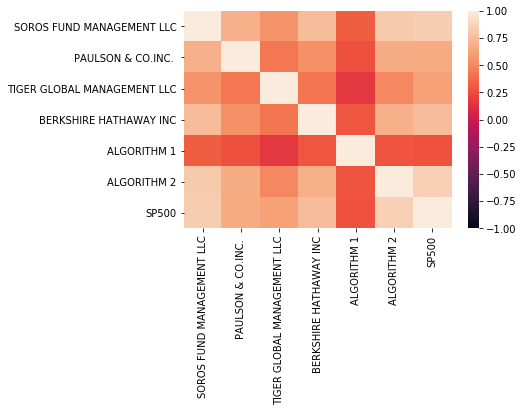

In [28]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)
print('Algorithm 2 is closest to mimick the performancre of S&P 500. Soros Fund Management LLC is the second closest to mimick the S&P 500 performance')

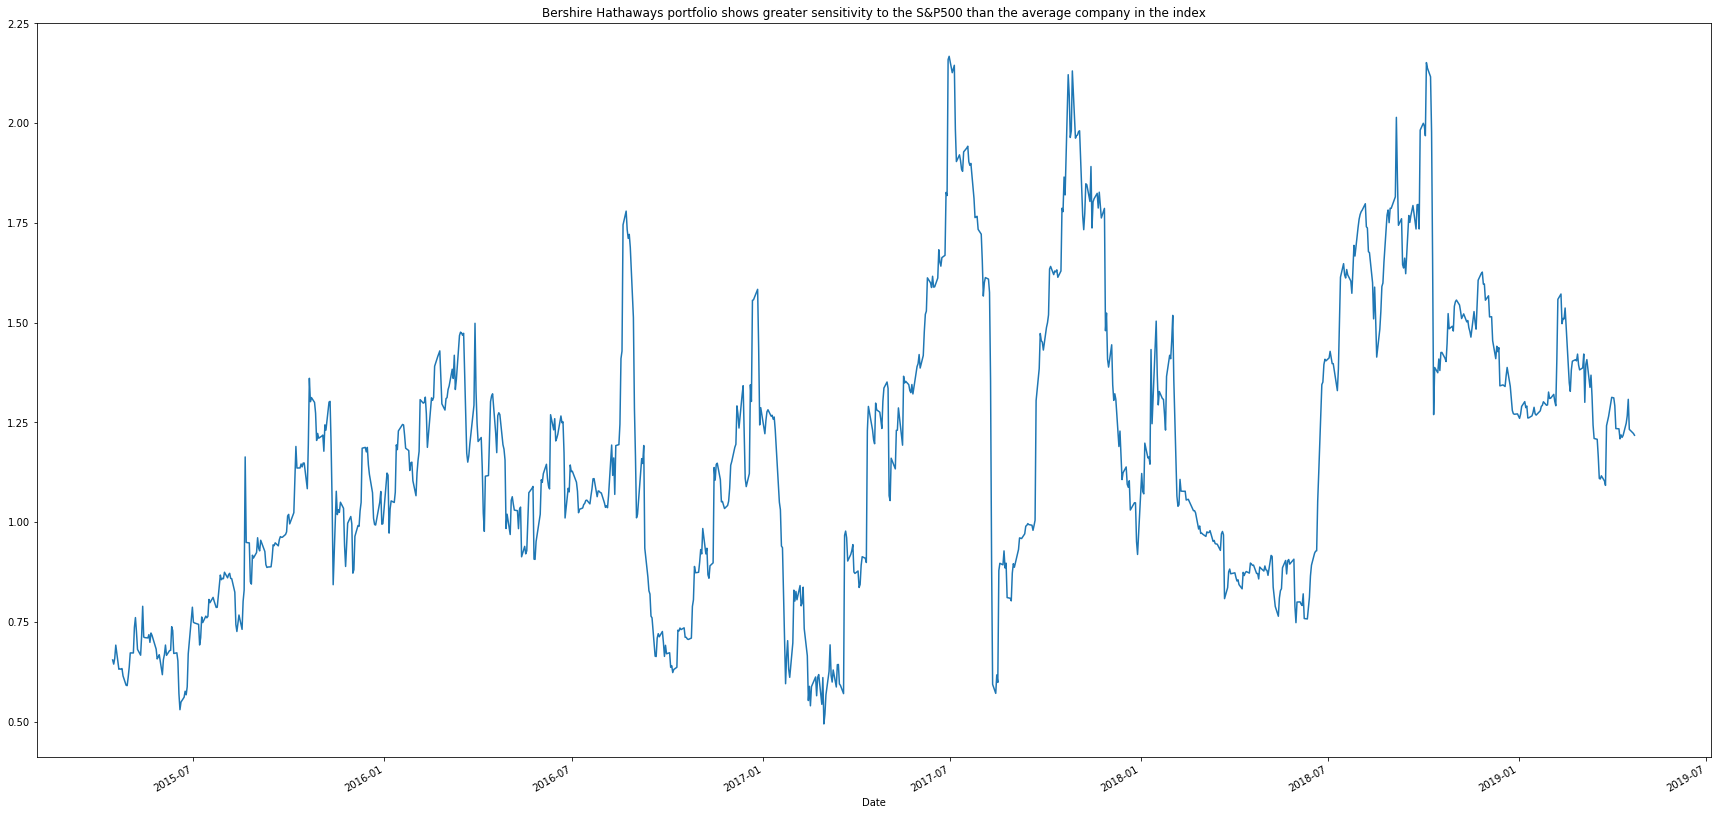

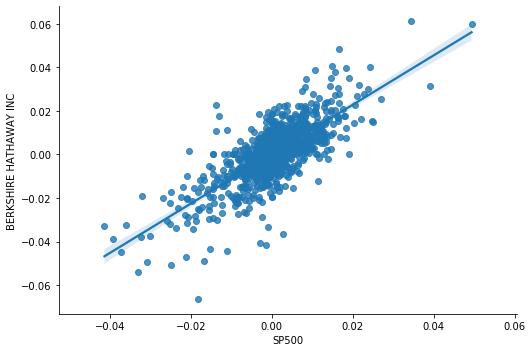

In [29]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
rolling_covariance = joined_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(joined_daily_returns['SP500'])
rolling_variance = joined_daily_returns['SP500'].rolling(window=30).var()
berkshire_hathaway_rolling_beta = rolling_covariance / rolling_variance
berkshire_hathaway_rolling_beta.plot(figsize=(30, 15), title='Bershire Hathaways portfolio shows greater sensitivity to the S&P500 than the average company in the index')
import seaborn as sns
sns.lmplot(x='SP500', y='BERKSHIRE HATHAWAY INC', data=joined_daily_returns, aspect=1.5, fit_reg=True)

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

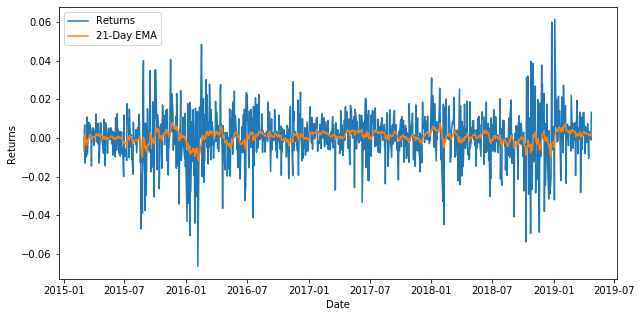

In [44]:
import numpy as np
import matplotlib.pyplot as plt
ema21 = joined_daily_returns['BERKSHIRE HATHAWAY INC'].ewm(span=21).mean()

plt.figure(figsize = (10,5))
plt.plot(joined_daily_returns['BERKSHIRE HATHAWAY INC'], label="Returns")
plt.plot(ema21, label="21-Day EMA")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [29]:
# Annualzied Sharpe Ratios
sharpe_ratios = (joined_daily_returns.mean() * 252) / (joined_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
ALGORITHM 1                    1.378648
ALGORITHM 2                    0.501364
SP500                          0.648240
dtype: float64

Algorithm 1 shows the best performance from a risk adjusted perspective


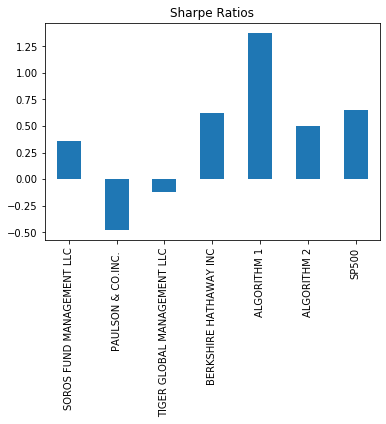

In [141]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")
print("Algorithm 1 shows the best performance from a risk adjusted perspective")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [95]:
# Read the first stock
# Reading whale returns
JPM_csv = Path("Resources/JPM_data.csv")

# YOUR CODE HERE
JPM_prices = pd.read_csv(JPM_csv)
dates = JPM_prices["Date"].str.split(" ", expand=True)
JPM_prices["Date"] = dates[0]
JPM_prices.set_index(pd.to_datetime(JPM_prices['Date'], infer_datetime_format=True), inplace=True)
JPM_prices = JPM_prices.drop(columns=["Date", "JP Morgan"])
JPM_prices.head()

,Close
Date,
2014-01-02,58.21
2014-01-03,58.66
2014-01-06,59.00
2014-01-07,58.32
2014-01-08,58.87


In [96]:
# Read the second stock
MS_csv = Path("Resources/MS_data.csv")

# YOUR CODE HERE
MS_prices = pd.read_csv(MS_csv)
dates = MS_prices["Date"].str.split(" ", expand=True)
MS_prices["Date"] = dates[0]
MS_prices.set_index(pd.to_datetime(MS_prices['Date'], infer_datetime_format=True), inplace=True)
MS_prices = MS_prices.drop(columns=["Date", "Morgan Stanley"])
MS_prices.head()

,Close
Date,
2014-01-02,31.03
2014-01-03,31.51
2014-01-06,31.62
2014-01-07,31.52
2014-01-08,31.56


In [97]:
# Read the third stock
GS_csv = Path("Resources/GS_data.csv")

# YOUR CODE HERE
GS_prices = pd.read_csv(GS_csv)
dates = GS_prices["Date"].str.split(" ", expand=True)
GS_prices["Date"] = dates[0]
GS_prices.set_index(pd.to_datetime(GS_prices['Date'], infer_datetime_format=True), inplace=True)
GS_prices = GS_prices.drop(columns=["Date", "Goldman Sachs"])
GS_prices.head()

,Close
Date,
2014-01-02,176.89
2014-01-03,178.15
2014-01-06,179.37
2014-01-07,178.29
2014-01-08,178.44


In [98]:
# Concatenate all stocks into a single DataFrame
joined_stocks = pd.concat([JPM_prices, MS_prices, GS_prices], axis='columns', join='inner')
columns = ["JP Morgan", "Morgan Stanley", "Goldman Sachs"]
joined_stocks.columns = columns
joined_stocks.head()

,JP Morgan,Morgan Stanley,Goldman Sachs
Date,,,
2014-01-02,58.21,31.03,176.89
2014-01-03,58.66,31.51,178.15
2014-01-06,59.00,31.62,179.37
2014-01-07,58.32,31.52,178.29
2014-01-08,58.87,31.56,178.44


In [99]:
# Drop Nulls
joined_stocks.dropna(inplace=True)
joined_stocks.head()

,JP Morgan,Morgan Stanley,Goldman Sachs
Date,,,
2014-01-02,58.21,31.03,176.89
2014-01-03,58.66,31.51,178.15
2014-01-06,59.00,31.62,179.37
2014-01-07,58.32,31.52,178.29
2014-01-08,58.87,31.56,178.44


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [100]:
# Calculate weighted portfolio returns
stock_returns = joined_stocks.pct_change()
stock_returns.head()

,JP Morgan,Morgan Stanley,Goldman Sachs
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,0.007731,0.015469,0.007123
2014-01-06,0.005796,0.003491,0.006848
2014-01-07,-0.011525,-0.003163,-0.006021
2014-01-08,0.009431,0.001269,0.000841


In [101]:
weights = [1/3, 1/3, 1/3]
portfolio_returns = stock_returns.dot(weights)
portfolio_returns.head()

Date
2014-01-02         NaN
2014-01-03    0.010108
2014-01-06    0.005378
2014-01-07   -0.006903
2014-01-08    0.003847
dtype: float64

In [102]:
portfolio_returns.to_csv("Resources/portfolio.csv", index=True)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [117]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_csv = Path("Resources/combined.csv")
combined_returns = pd.read_csv(combined_csv)
combined_returns.set_index(pd.to_datetime(combined_returns['Date'], infer_datetime_format=True), inplace=True)
combined_returns = combined_returns.drop(columns=["Date"])

In [116]:
portfolio_csv = Path("Resources/portfolio.csv")
portfolio_daily_returns = pd.read_csv(portfolio_csv)
portfolio_daily_returns.set_index(pd.to_datetime(portfolio_daily_returns['Date'], infer_datetime_format=True), inplace=True)
portfolio_daily_returns = portfolio_daily_returns.drop(columns=["Date"])
columns = ["PORTFOLIO"]
portfolio_daily_returns.columns = columns

In [129]:
joined_portfolio_daily_returns = pd.concat([combined_returns, portfolio_daily_returns], axis='columns', join='inner')
joined_portfolio_daily_returns.dropna(inplace=True)
joined_portfolio_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGORITHM 1,ALGORITHM 2,SP500,PORTFOLIO
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004724,-0.003688
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004271,-0.008721
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001430,0.004108
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014279,-0.011433
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003863,0.006472
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000688,0.013535
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002408,0.028399
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001724,-0.010544


In [130]:
joined_portfolio_daily_returns.to_csv("Resources/all_portfolio_returns.csv", index=False)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

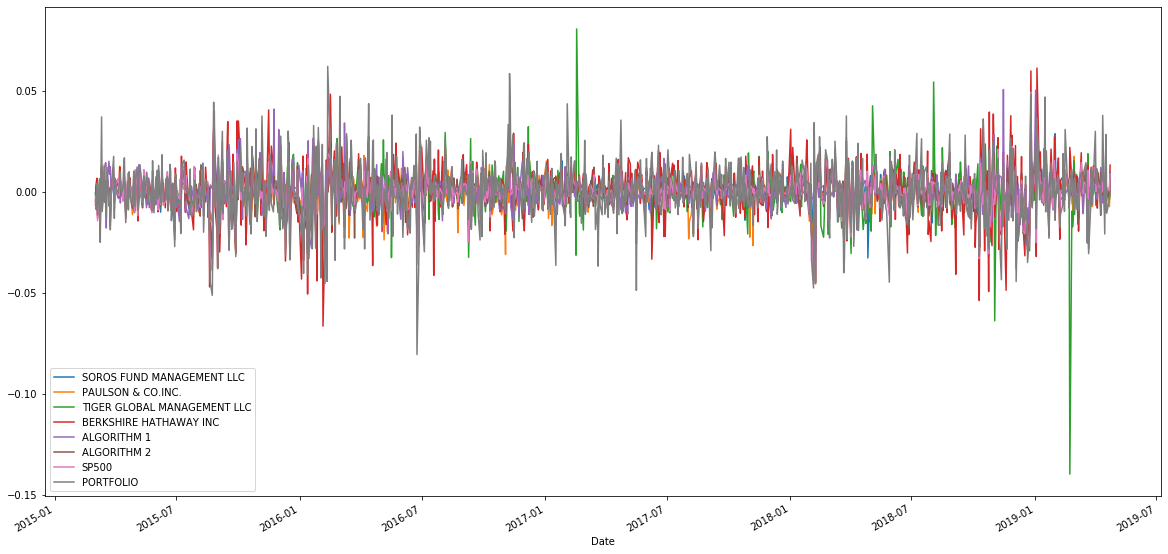

In [131]:
# Risk
joined_portfolio_daily_returns.plot(figsize=(20,10))

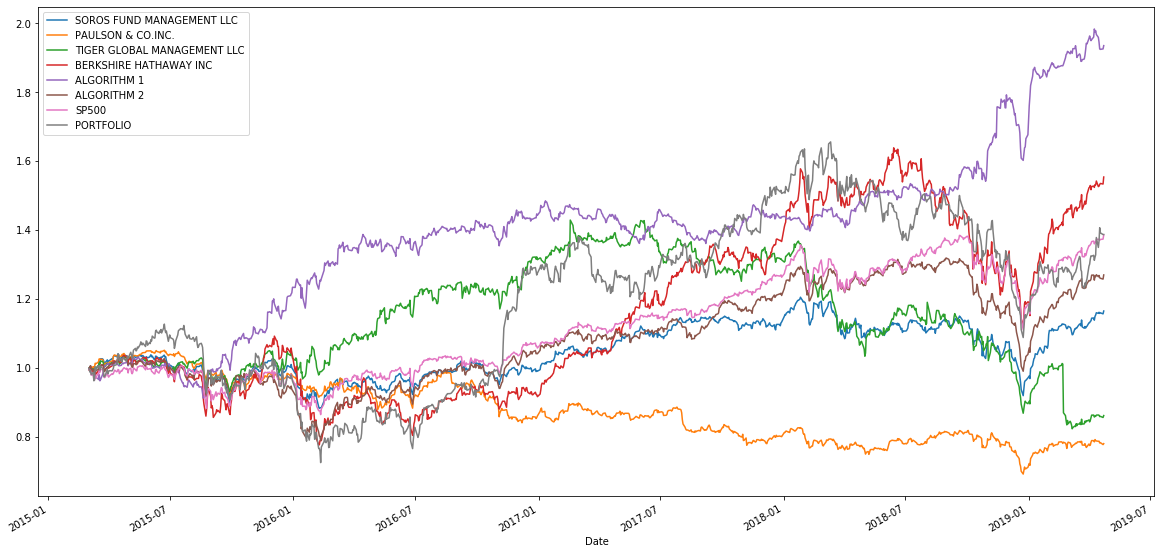

In [132]:
joined_cumulative_portfolio_returns = (1 + joined_portfolio_daily_returns).cumprod()
joined_cumulative_portfolio_returns.plot(figsize=(20,10))

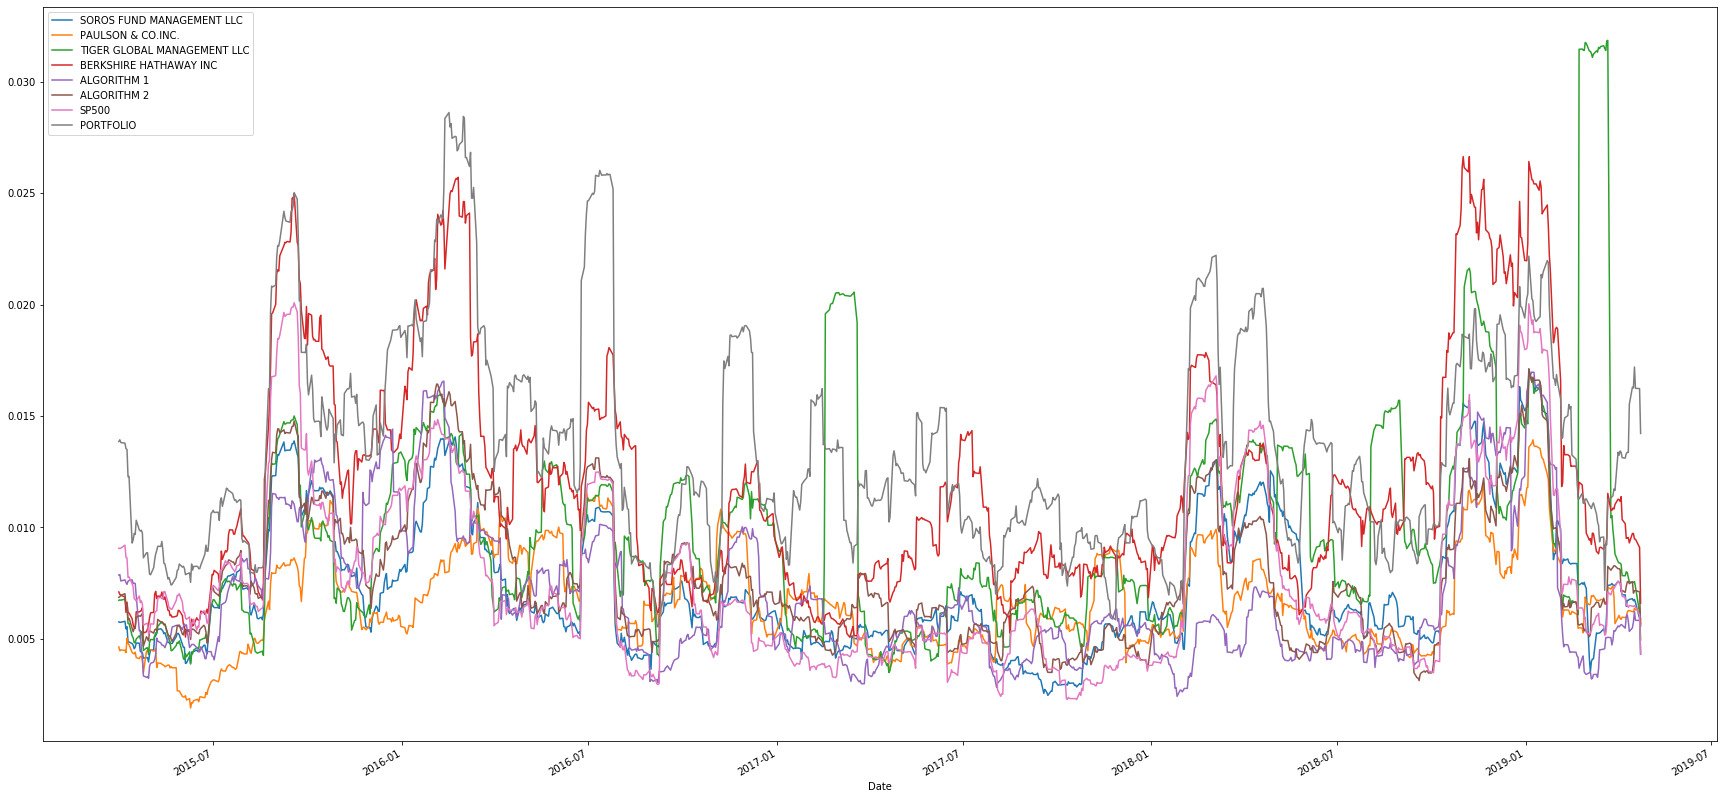

In [134]:
# Rolling
joined_portfolio_daily_returns.rolling(window=21).std().plot(figsize=(30,15))

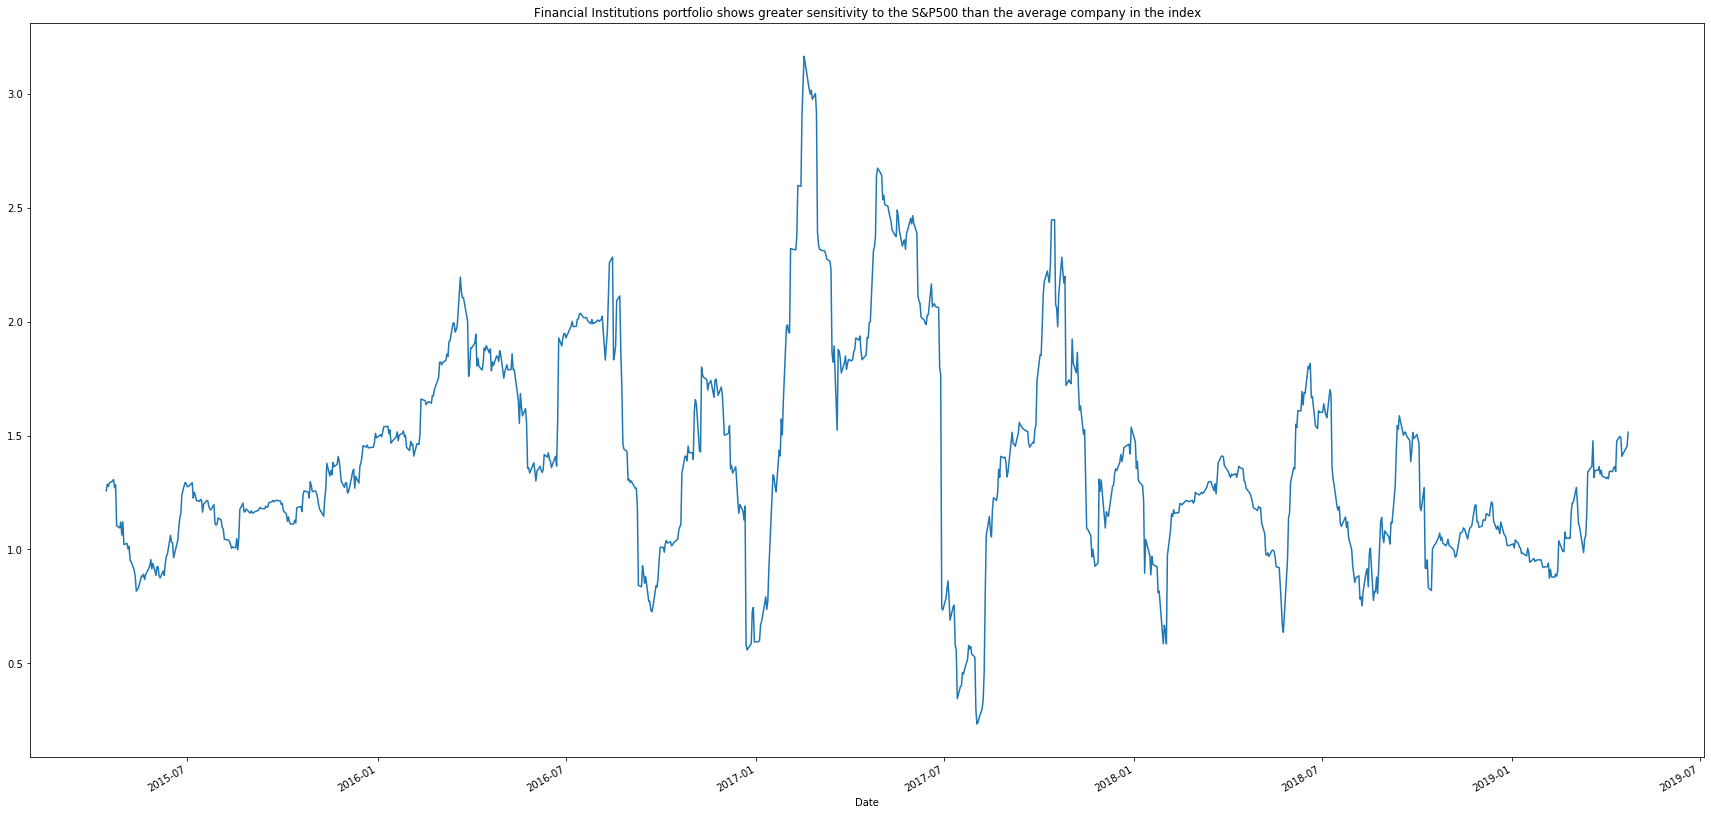

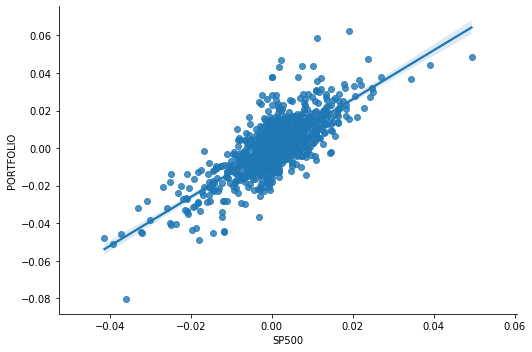

In [139]:
# Beta
portfolio_rolling_covariance = joined_portfolio_daily_returns['PORTFOLIO'].rolling(window=30).cov(joined_portfolio_daily_returns['SP500'])
portfolio_rolling_variance = joined_portfolio_daily_returns['SP500'].rolling(window=30).var()
portfolio_rolling_beta = portfolio_rolling_covariance / portfolio_rolling_variance
portfolio_rolling_beta
portfolio_rolling_beta.plot(figsize=(30, 15), title='Financial Institutions portfolio shows greater sensitivity to the S&P500 than the average company in the index')
import seaborn as sns
sns.lmplot(x='SP500', y='PORTFOLIO', data=joined_portfolio_daily_returns, aspect=1.5, fit_reg=True)

In [140]:
# Annualzied Sharpe Ratios
portfolio_sharpe_ratios = (joined_portfolio_daily_returns.mean() * 252) / (joined_portfolio_daily_returns.std() * np.sqrt(252))
portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
ALGORITHM 1                    1.378648
ALGORITHM 2                    0.501364
SP500                          0.648240
PORTFOLIO                      0.459635
dtype: float64

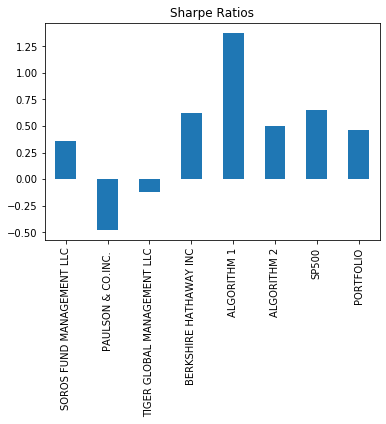

In [142]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [143]:
portfolio_correlation = joined_portfolio_daily_returns.corr()
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGORITHM 1,ALGORITHM 2,SP500,PORTFOLIO
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837835,0.639027
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.670319,0.510524
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.624059,0.443583
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.750997,0.543445
ALGORITHM 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279497,0.210085
ALGORITHM 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858858,0.709323
SP500,0.837835,0.670319,0.624059,0.750997,0.279497,0.858858,1.000000,0.772692
PORTFOLIO,0.639027,0.510524,0.443583,0.543445,0.210085,0.709323,0.772692,1.000000


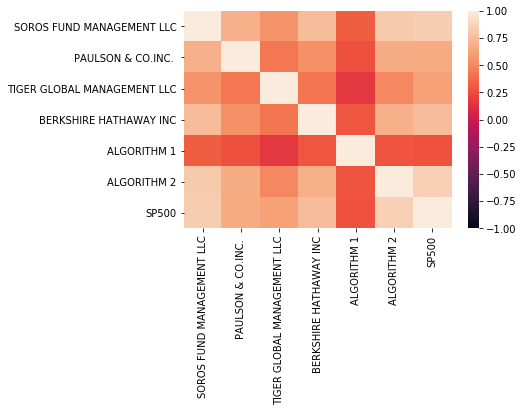

In [144]:
sns.heatmap(correlation, vmin=-1, vmax=1)